<a href="https://colab.research.google.com/github/naval55/stock_prediction/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
netflix_stock_data = pd.read_csv('../content/input/NFLX.csv')
netflix_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [3]:
netflix_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [4]:
netflix_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [5]:
netflix_stock_data = netflix_stock_data[['Date','Open','Close']]
netflix_stock_data['Date'] = pd.to_datetime(netflix_stock_data['Date'].apply(lambda x: x.split()[0]))
netflix_stock_data.set_index('Date',drop=True,inplace=True)
netflix_stock_data.head()

<ipython-input-5-4d6d7059876d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_stock_data['Date'] = pd.to_datetime(netflix_stock_data['Date'].apply(lambda x: x.split()[0])) # Selecting only date


,Open,Close
Date,,
2002-05-23,1.156429,1.196429
2002-05-24,1.214286,1.210000
2002-05-28,1.213571,1.157143
2002-05-29,1.164286,1.103571
2002-05-30,1.107857,1.071429


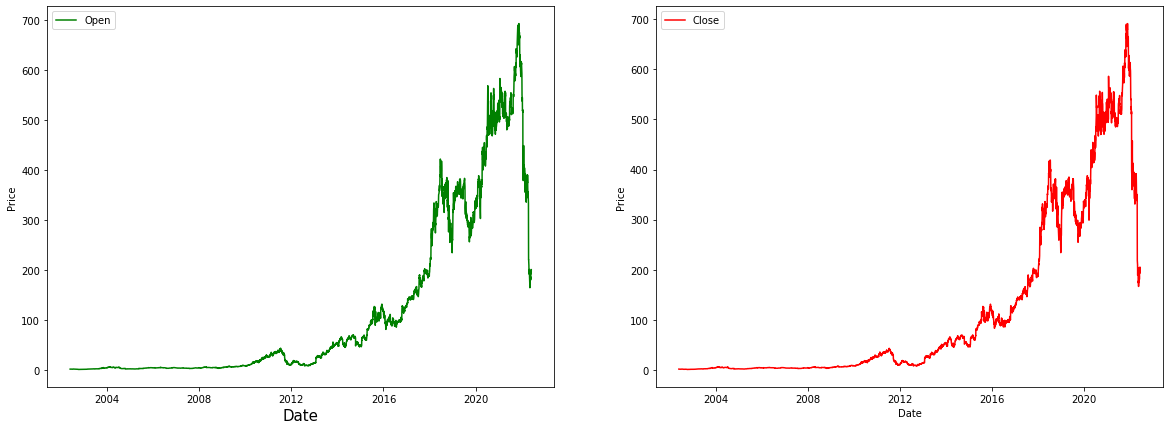

In [6]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(netflix_stock_data['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=10)
ax[0].legend()

ax[1].plot(netflix_stock_data['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=10)
ax[1].set_ylabel('Price',size=10)
ax[1].legend()

fg.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
netflix_stock_data[netflix_stock_data.columns] = MMS.fit_transform(netflix_stock_data)

In [8]:
netflix_stock_data.shape

(5044, 2)

In [29]:
training_size = round(len(netflix_stock_data) * 0.70)
training_size

3531

In [30]:
train_data = netflix_stock_data[:training_size]
test_data  = netflix_stock_data[training_size:]

train_data.shape, test_data.shape

((3531, 2), (1513, 2))

In [31]:

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)):
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [32]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [33]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((3481, 50, 2), (3481, 2), (1463, 50, 2), (1463, 2))

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [35]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(train_seq, train_label, epochs=25,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/25
109/109 [==============================] - 16s 146ms/step - loss: 8.2209e-06 - mean_absolute_error: 0.0017 - val_loss: 0.0029 - val_mean_absolute_error: 0.0412
Epoch 2/25
109/109 [==============================] - 11s 100ms/step - loss: 8.5541e-06 - mean_absolute_error: 0.0017 - val_loss: 0.0014 - val_mean_absolute_error: 0.0273
Epoch 3/25
109/109 [==============================] - 9s 84ms/step - loss: 8.9544e-06 - mean_absolute_error: 0.0017 - val_loss: 0.0014 - val_mean_absolute_error: 0.0270
Epoch 4/25
109/109 [==============================] - 8s 72ms/step - loss: 8.9887e-06 - mean_absolute_error: 0.0019 - val_loss: 0.0020 - val_mean_absolute_error: 0.0329
Epoch 5/25
109/109 [==============================] - 8s 77ms/step - loss: 7.7656e-06 - mean_absolute_error: 0.0017 - val_loss: 0.0017 - val_mean_absolute_error: 0.0307
Epoch 6/25
109/109 [==============================] - 9s 83ms/step - loss: 7.4999e-06 - mean_absolute_error: 0.0016 - val_loss: 0.0022 - val_mean_absol

In [38]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

46/46 [==============================] - 2s 18ms/step


array([[0.1374299 , 0.1357145 ],
       [0.13852826, 0.13679235],
       [0.13892105, 0.13717487],
       [0.13854024, 0.13679421],
       [0.13873379, 0.13698213]], dtype=float32)

In [41]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[95.47551 , 94.19462 ],
       [96.23554 , 94.93976 ],
       [96.50735 , 95.2042  ],
       [96.243835, 94.94104 ],
       [96.37777 , 95.07095 ]], dtype=float32)

In [43]:
gs_slic_data = pd.concat([netflix_stock_data.iloc[-1463:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=netflix_stock_data.iloc[-1463:].index)], axis=1)

In [44]:
gs_slic_data[['Open','Close']] = MMS.inverse_transform(gs_slic_data[['Open','Close']])

In [45]:
gs_slic_data.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2016-08-12,95.529999,96.589996,95.475510,94.194618
2016-08-15,96.830002,95.309998,96.235542,94.939758
2016-08-16,95.190002,95.120003,96.507347,95.204201
2016-08-17,94.940002,96.370003,96.243835,94.941040
2016-08-18,95.980003,96.160004,96.377769,95.070953


In [46]:
gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))

In [47]:
gs_slic_data['2022-05-31	':'2022-06-08']

,Open,Close,open_predicted,close_predicted
2022-05-31,196.179993,197.440002,192.261154,188.384094
2022-06-01,198.699997,192.910004,195.932495,191.950653
2022-06-02,192.020004,205.089996,196.336121,192.341843
2022-06-03,200.139999,198.979996,199.023254,194.949829
2022-06-04,NaN,NaN,NaN,NaN
2022-06-05,NaN,NaN,NaN,NaN
2022-06-06,NaN,NaN,NaN,NaN
2022-06-07,NaN,NaN,NaN,NaN
2022-06-08,NaN,NaN,NaN,NaN


In [48]:
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=gs_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)


In [49]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 27ms/step


In [50]:
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

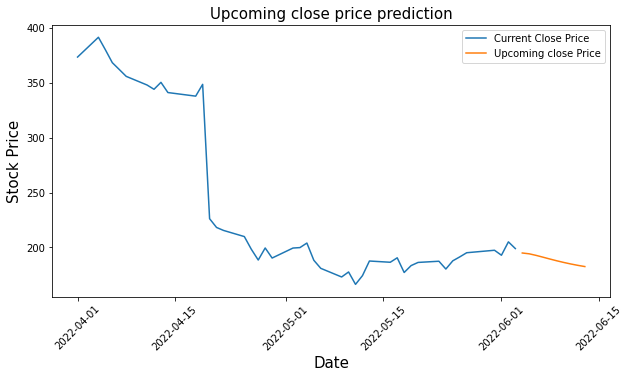

In [51]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2022-04-01':,'Close'],label='Current Close Price')
ax.plot(upcoming_prediction.loc['2022-04-01':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()